# <font color='darkblue'>Planar Data classification with One Hidden Layer</font>

## <font color='Indianred'>Packages</font>

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- <code>testCases</code> provides some test examples.
- <code>planar_utils</code> provide some utilities for this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## <font color='indianred'> Data </font>

The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [2]:
X, Y = load_planar_dataset()

Visualize the dataset using `matplotlib`. The data looks like a *flower* with some red (label y = 0) and some blue (y = 1) points. 

**Goal**: build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

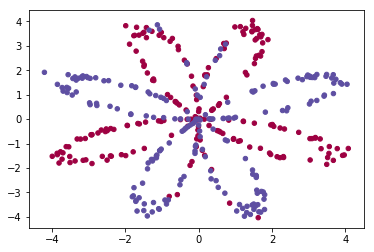

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap = plt.cm.Spectral);

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: What is the `shape` of the variables `X` and `Y`? 

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('m = %d training examples' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
m = 400 training examples


There are 400 samples in `X`. Each sample has dimension 2. Corresponding `Y` variable has 400 binary values to indicate `red` or `blue`.

## <font color='indianred'>Simple Logistic Regression</font>

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use `sklearn`'s built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

Accuracy: 47%


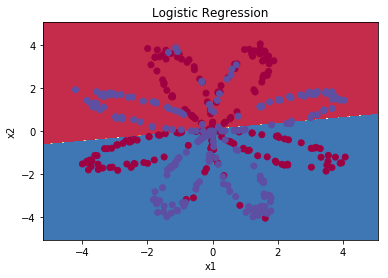

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
accuracy = float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)
print ('Accuracy: %d' % accuracy + '%')

**Interpretation**: 

The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better.

## <font color='indianred'>Neural Network model</font>

Train a Neural Network with a single hidden layer.

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$ 

$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$

$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$

$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$

$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small$$

**Reminder**: The general methodology to build a Neural Network is to:

    1. Define the neural network structure. 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation
        - Update parameters (gradient descent)

### <font color='MediumSeaGreen'>Helper function</font> - Defining NN layers

**Exercise**: Define three variables:
    - n_x: the size of the input layer  (matching the f.v)
    - n_h: the size of the hidden layer (for now, n_h = 4)
    - n_y: the size of the output layer (matching

In [7]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]                         # size of input layer
    n_h = 4                                  # hard-coded
    n_y = Y.shape[0]                         # size of output layer - single real number
    
    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Test size of input layer  is: n_x = " + str(n_x))
print("Test size of hidden layer is: n_h = " + str(n_h))
print("Test size of output layer is: n_y = " + str(n_y))

Test size of input layer  is: n_x = 5
Test size of hidden layer is: n_h = 4
Test size of output layer is: n_y = 2


**Expected Output** 

`input layer` : 5 

`hidden layer`: 4 

`output layer`: 2

### <font color='MediumSeaGreen'> Helper function</font> Initialize parameters

**Exercise**: Implement the function `initialize_parameters()`.

- Initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- Initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    # pack the parameters into a dict
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))

W1 = 
[[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = 
[[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = 
[[ 0.]]


### <font color='MediumSeaGreen'>Helper function</font> - Forward propagation

**Question**: Implement `forward_propagation()`.

**Instructions**:
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.

**Steps**
- Retrieve each parameter from the dictionary "parameters".
- Implement Forward Propagation. 
- Values needed in the backpropagation are stored in "`cache`". 

In [11]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
     
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))
print ("A2 Size: ", str(A2.size))

0.262818640198 0.091999045227 -1.30766601287 0.212877681719
A2 Size:  3


**Expected Output**:
`0.262818640198 0.091999045227 -1.30766601287 0.212877681719`

### <font color='MediumSeaGreen'>Helper function</font> - Cost Function

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```


**Note** 
You can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`

If you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [13]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1]

    # Compute the cross-entropy cost    
    logprobs = np.multiply(np.log(A2),Y)
    cost = - np.sum(logprobs)

    cost = float(np.squeeze(cost))
    assert(isinstance(cost, float))
    return cost

In [14]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6926858869721941


### <font color='MediumSeaGreen'>Helper function</font> - Backpropagation

**Question**: Implement the function `backward_propagation()`.


$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$


**Vectorized**

$dZ^{[2]} = A^{[2]} -Y$

$dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]T}$

$db^{[2]} = \frac{1}{m} np.sum(dZ^{[2]}, axis = 1, keepdims = True)$

$dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]'}(A^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]}X^{T}$

$db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, axis = 1, keepdims = True)$


**Tips** : <font color='indigo'>To compute $dZ1$ you'll need to compute $g^{[1]'}(A^{[1]})$. Since $g^{[1]}(.)$ is the `tanh` activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}$ using `(1 - np.power(A1, 2))`.</font>

In [15]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters", and A1, A2 from "cache"

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.multiply( np.dot(W2.T, dZ2), 1 - np.power(A1,2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True) 

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("db1 = \n"+ str(grads["db1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("db2 = \n"+ str(grads["db2"]))

dW1 = 
[[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = 
[[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = 
[[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = 
[[-0.16655712]]


**Expected output**:


`dw1 = [ [0.00301023 -0.00747267 ]
        [0.00257968 -0.00641288 ]
        [-0.00156892  0.003893  ]
        [-0.00652037  0.01618243]]`
  
`db1 = [  [ 0.00176201]
         [ 0.00150995]
         [-0.00091736]
         [-0.00381422]]`
        
`dW2 =  [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]`
 
`db2 = [[-0.16655712]]`

### <font color='MediumSeaGreen'>Helper function</font> - Gradient Descent

**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [17]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    # Retrieve each gradient from the dictionary "grads"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
     
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))

W1 = 
[[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = 
[[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = 
[[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = 
[[ 0.00010457]]


**Expected Output**:

`W1 = 
[[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]`

`b1 = 
[[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]`
 
`W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]`

`b2 = [[ 0.00010457]]`

### <font color='MediumSeaGreen'>Helper function</font> Integrate as `nn_model()`

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [19]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    
    n_x = layer_sizes(X, Y)[0]              # define the layer structure
    n_y = layer_sizes(X, Y)[2]              # input layer and output layer
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 2000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [20]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))

Cost after iteration 0: 1.385354
Cost after iteration 2000: 0.000158
Cost after iteration 4000: 0.000079
Cost after iteration 6000: 0.000053
Cost after iteration 8000: 0.000040
W1 = 
[[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = 
[[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = 
[[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = 
[[ 0.20459656]]


**Expected Output**:

`W1 = [[-0.65848169  1.21866811]
     [-0.76204273  1.39377573]
     [ 0.5792005  -1.10397703]
     [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
     [ 0.3511264 ]
     [-0.2431246 ]
     [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[ 0.20459656]]`

### <font color='IndianRed'>Predictions</font>

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [21]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache   = forward_propagation(X, parameters)
    predictions = np.around(A2)
    return predictions

In [22]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


## Test <font color='MediumSeaGreen'>nn_model</font> on planar data

Cost after iteration 0: 138.613963
Cost after iteration 2000: 50.677062
Cost after iteration 4000: 45.276968
Cost after iteration 6000: 43.847601
Cost after iteration 8000: 39.839553


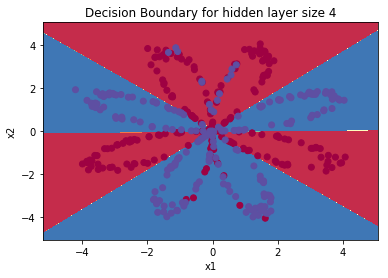

In [23]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. Now, let's try out several hidden layer sizes.

### <font color='IndianRed'>Tuning hidden layer size</font>

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %


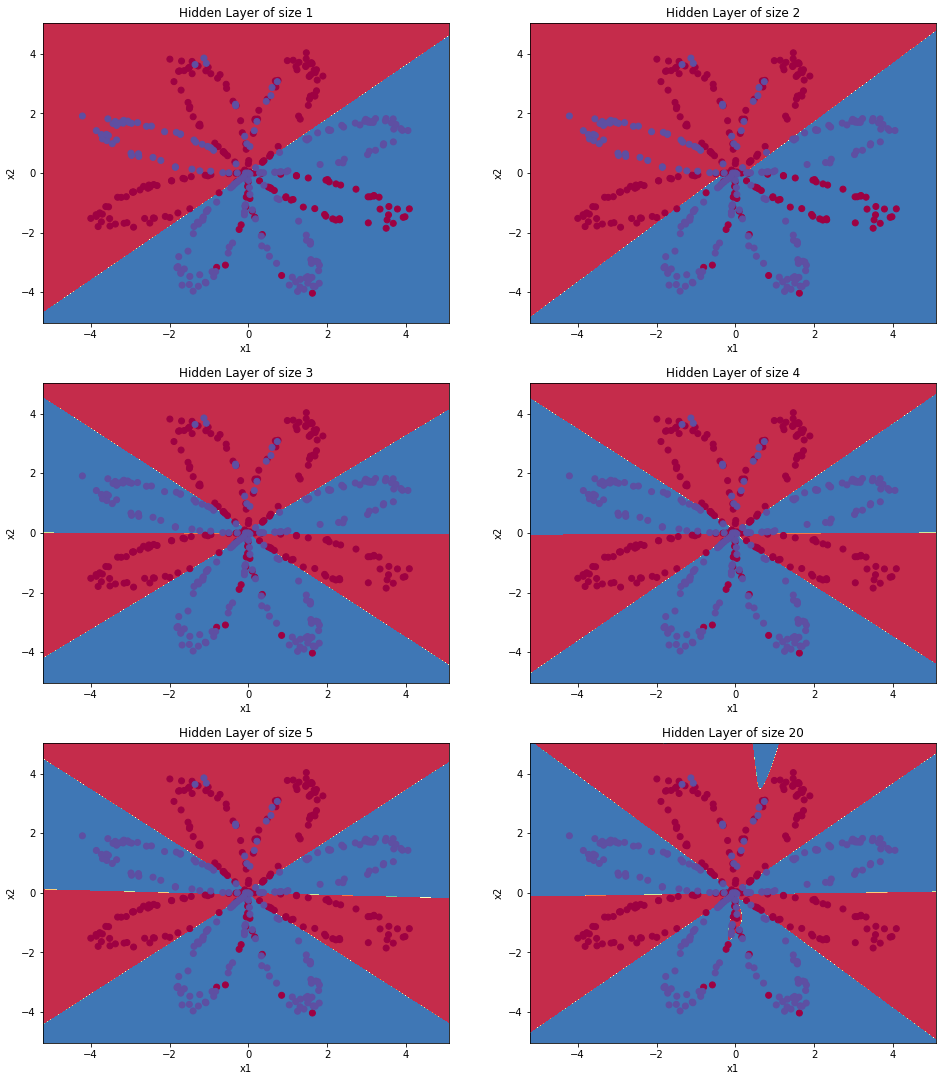

In [25]:
plt.figure(figsize=(16, 32))

hidden_layer_sizes = [1, 2, 3, 4, 5, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:

- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 

- The best hidden layer size seems to be around `n_h = 5`. Indeed, a value around here seems to fits the data well without also incurring noticeable overfitting.

- You will also learn later about regularization, which lets you use very large models (such as `n_h = 50`) without much overfitting. 

**Optional questions**:

**Note**: Remember to submit the assignment by clicking the blue "Submit Assignment" button at the upper-right. 

Some optional/ungraded questions that you can explore if you wish: 
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part 5 below!)

## <font color='IndianRed'>Performance on other datasets</font>

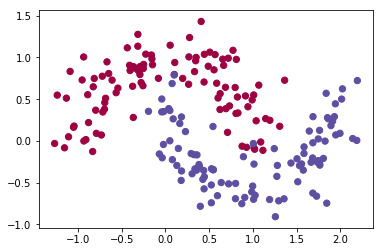

In [26]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Accuracy for 1 hidden units: 86.5 %
Accuracy for 2 hidden units: 87.0 %
Accuracy for 3 hidden units: 98.5 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 98.5 %
Accuracy for 10 hidden units: 98.5 %


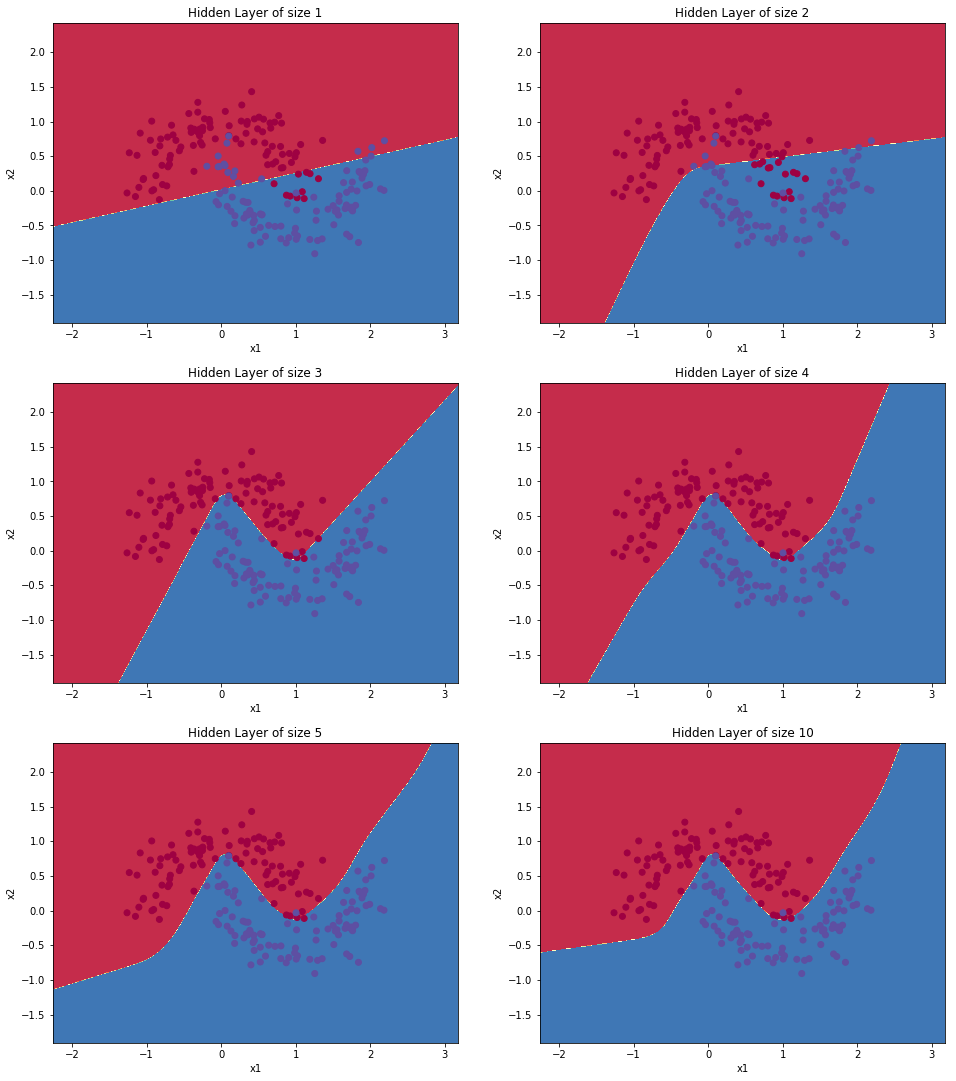

In [27]:
plt.figure(figsize=(16, 32))

hidden_layer_sizes = [1, 2, 3, 4, 5, 10]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    
    parameters = nn_model(X, Y, n_h, num_iterations = 10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))